### import libary yang diperlukan

In [9]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [63]:

rafi = pd.read_csv("bodyPerformance.csv")
rafi.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### lakukan one hot encode pada kolom yabg akan menjadi target
### dari kolom age terdapat umur 21 sampai umur 64 dan class terdapat 4 kelas


In [65]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categories = ["age", "class"]
rafi_categorical = encoder.fit_transform(df[categories])
categorical = encoder.get_feature_names_out(categories)
rafi_categorical = pd.DataFrame(rafi_categorical, columns=categorical)

rafi_categorical.head()

,age_21.0,age_22.0,age_23.0,age_24.0,age_25.0,age_26.0,age_27.0,age_28.0,age_29.0,age_30.0,...,age_59.0,age_60.0,age_61.0,age_62.0,age_63.0,age_64.0,class_A,class_B,class_C,class_D
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### lalu satukan saja pada dataset

In [66]:
rafi = pd.concat([rafi, rafi_categorical], axis=1)
rafi.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,...,age_59.0,age_60.0,age_61.0,age_62.0,age_63.0,age_64.0,class_A,class_B,class_C,class_D
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### lalu pilih fitur X dan juga Y sebagai targetnya


In [67]:
X1 = rafi['age_30.0'] 
y1 = rafi['class_A']

### split datanya untuk di latih dan di test dengan size 20%

In [68]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

### lalu membuat model dnn nya menggunakan sequential model dengan beberapa layer serta model compilenya menggunakan optimizer adam loss nya binary dan metrics accuracy

In [69]:
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=[1]),
    layers.Dense(50, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### kemudian kita akan melakukan pelatihan pada model dengan model fit

In [71]:
hist=model.fit(X1_train,y1_train, epochs=100 ,validation_split =0.2,batch_size=32)

Epoch 1/100
101/101 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7488 - val_loss: 0.5546 - val_accuracy: 0.7555
Epoch 2/100
101/101 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7488 - val_loss: 0.5547 - val_accuracy: 0.7555
Epoch 3/100
101/101 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7488 - val_loss: 0.5547 - val_accuracy: 0.7555
Epoch 4/100
101/101 [==============================] - 0s 4ms/step - loss: 0.5636 - accuracy: 0.7488 - val_loss: 0.5546 - val_accuracy: 0.7555
Epoch 5/100
101/101 [==============================] - 0s 5ms/step - loss: 0.5633 - accuracy: 0.7488 - val_loss: 0.5548 - val_accuracy: 0.7555
Epoch 6/100
101/101 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7488 - val_loss: 0.5547 - val_accuracy: 0.7555
Epoch 7/100
101/101 [==============================] - 0s 4ms/step - loss: 0.5633 - accuracy: 0.7488 - val_loss: 0.5550 - val_accuracy: 0.7555

In [72]:
y1_pred = model.predict(X1_test)
y1_pred_classes = np.argmax(y1_pred, axis=-1)

accuracy = accuracy_score(y1_test, y1_pred_classes)
print("Akurasi:", accuracy)

84/84 [==============================] - 0s 2ms/step
Akurasi: 0.744307577454274


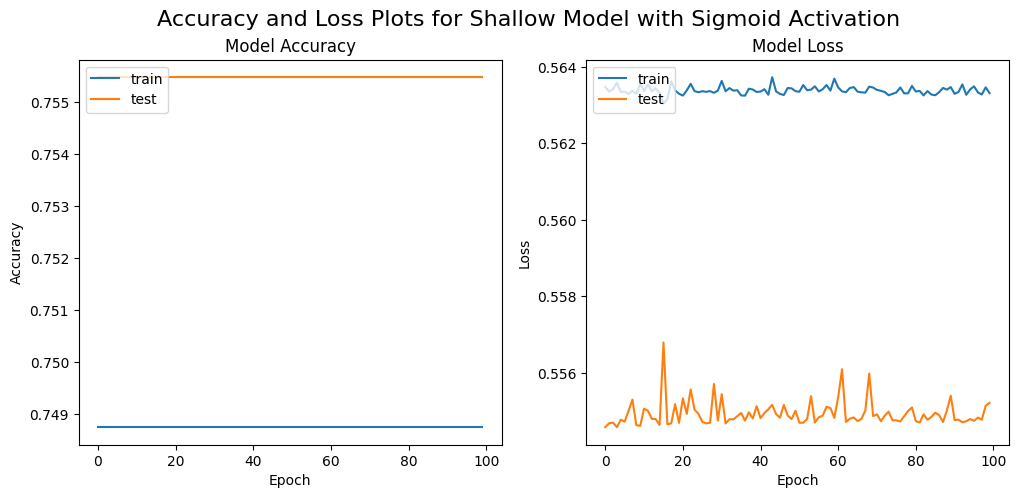

In [73]:
import matplotlib.pyplot as plt
def plot_acc_loss(history, model_name):
    # Plot the accuracy and loss graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')

    fig.suptitle(f"Accuracy and Loss Plots for {model_name}", fontsize=16)
    plt.show()

plot_acc_loss(hist, "Shallow Model with Sigmoid Activation")